In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainset='/content/drive/MyDrive/AI_Data/TienVN'

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
     

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 4787 images belonging to 3 classes.
Found 530 images belonging to 3 classes.


In [ ]:
validation_set.class_indices

{'10000': 0, '20000': 1, '50000': 2}

In [ ]:
{'.ipynb_checkpoints': 0,'10000': 0, '20000': 1, '50000': 2}

{'.ipynb_checkpoints': 0, '10000': 0, '20000': 1, '50000': 2}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
38/38 [==============================] - 808s 21s/step - loss: 1.8945 - accuracy: 0.3771 - val_loss: 1.0857 - val_accuracy: 0.3717
Epoch 2/50
38/38 [==============================] - 43s 1s/step - loss: 1.0909 - accuracy: 0.3971 - val_loss: 1.0873 - val_accuracy: 0.4151
Epoch 3/50
38/38 [==============================] - 44s 1s/step - loss: 0.7437 - accuracy: 0.6137 - val_loss: 0.4488 - val_accuracy: 0.7434
Epoch 4/50
38/38 [==============================] - 44s 1s/step - loss: 0.4117 - accuracy: 0.7930 - val_loss: 0.2153 - val_accuracy: 0.9642
Epoch 5/50
38/38 [==============================] - 44s 1s/step - loss: 0.2611 - accuracy: 0.9027 - val_loss: 0.1367 - val_accuracy: 0.9340
Epoch 6/50
38/38 [==============================] - 44s 1s/step - loss: 0.0822 - accuracy: 0.9731 - val_loss: 0.0176 - val_accuracy: 0.9906
Epoch 7/50
38/38 [==============================] - 44s 1s/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0922 - val_accuracy: 0.9679
Epoch 8/50
38/38 [

In [ ]:
model.save('TienVN.h5')

In [ ]:
model1=load_model('TienVN.h5')

In [ ]:
label = ['10k','20k','50k']

1/1 [==============================] - 1s 955ms/step
10k


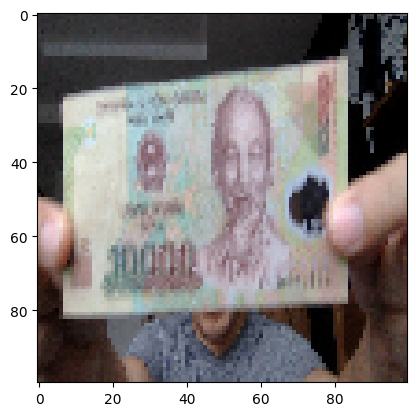

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('147.png', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 39ms/step
20k


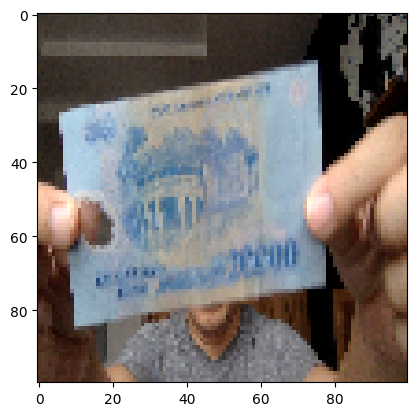

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('74.png', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 22ms/step
50k


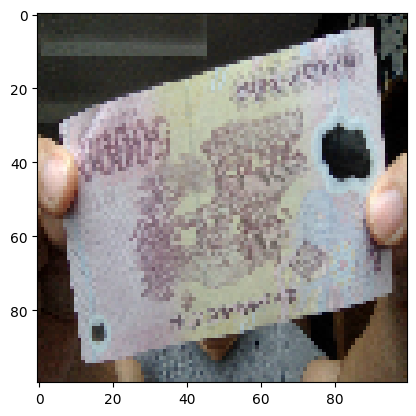

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('99.png', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])